In [ ]:
pip install pandas numpy seaborn matplotlib

First few rows of the dataset:
   JEE Score/Rank  Mountain Area  Out of City Campus  Away from Home  \
0               0              1                   4               2   
1               3              2                   4               0   
2               1              3                   2               4   
3               1              2                   0               0   
4               3              4                   4               2   

   Good Reputation  Family Pressure  Many Places to Travel  Good Education  \
0                4                0                      3               0   
1                4                3                      1               2   
2                0                1                      3               2   
3                4                1                      3               4   
4                1                0                      3               4   

   Peer Referral  University Reach-Out  Good Placements  
0        

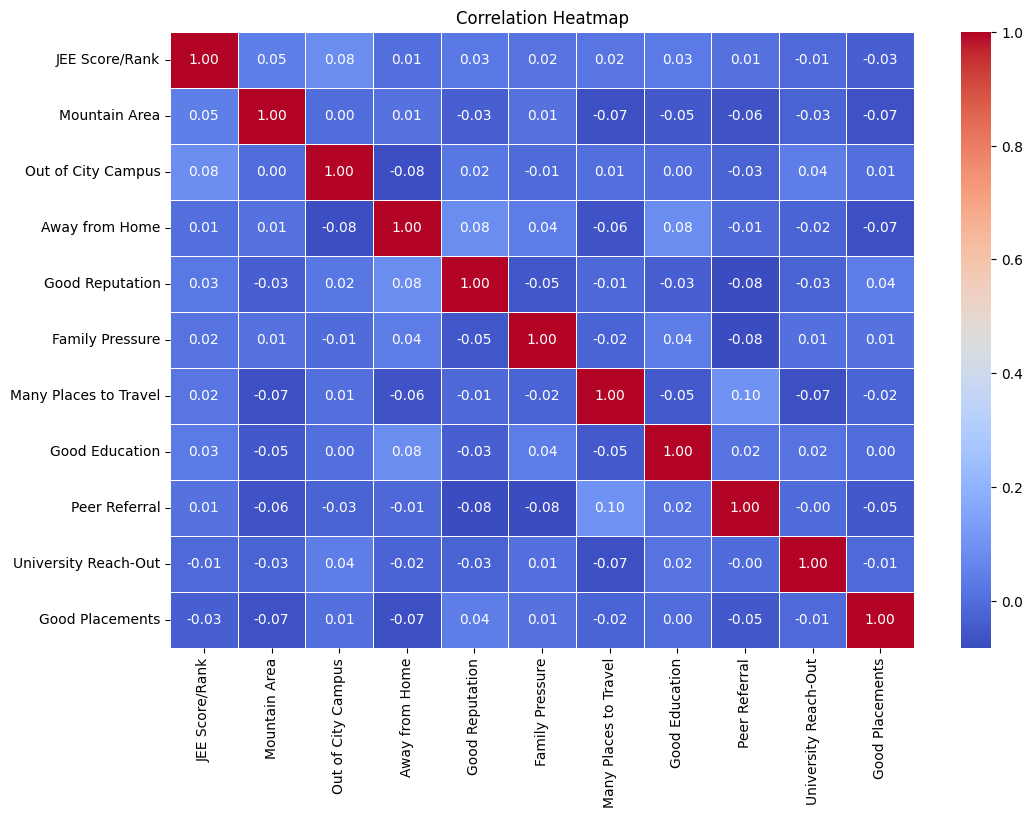

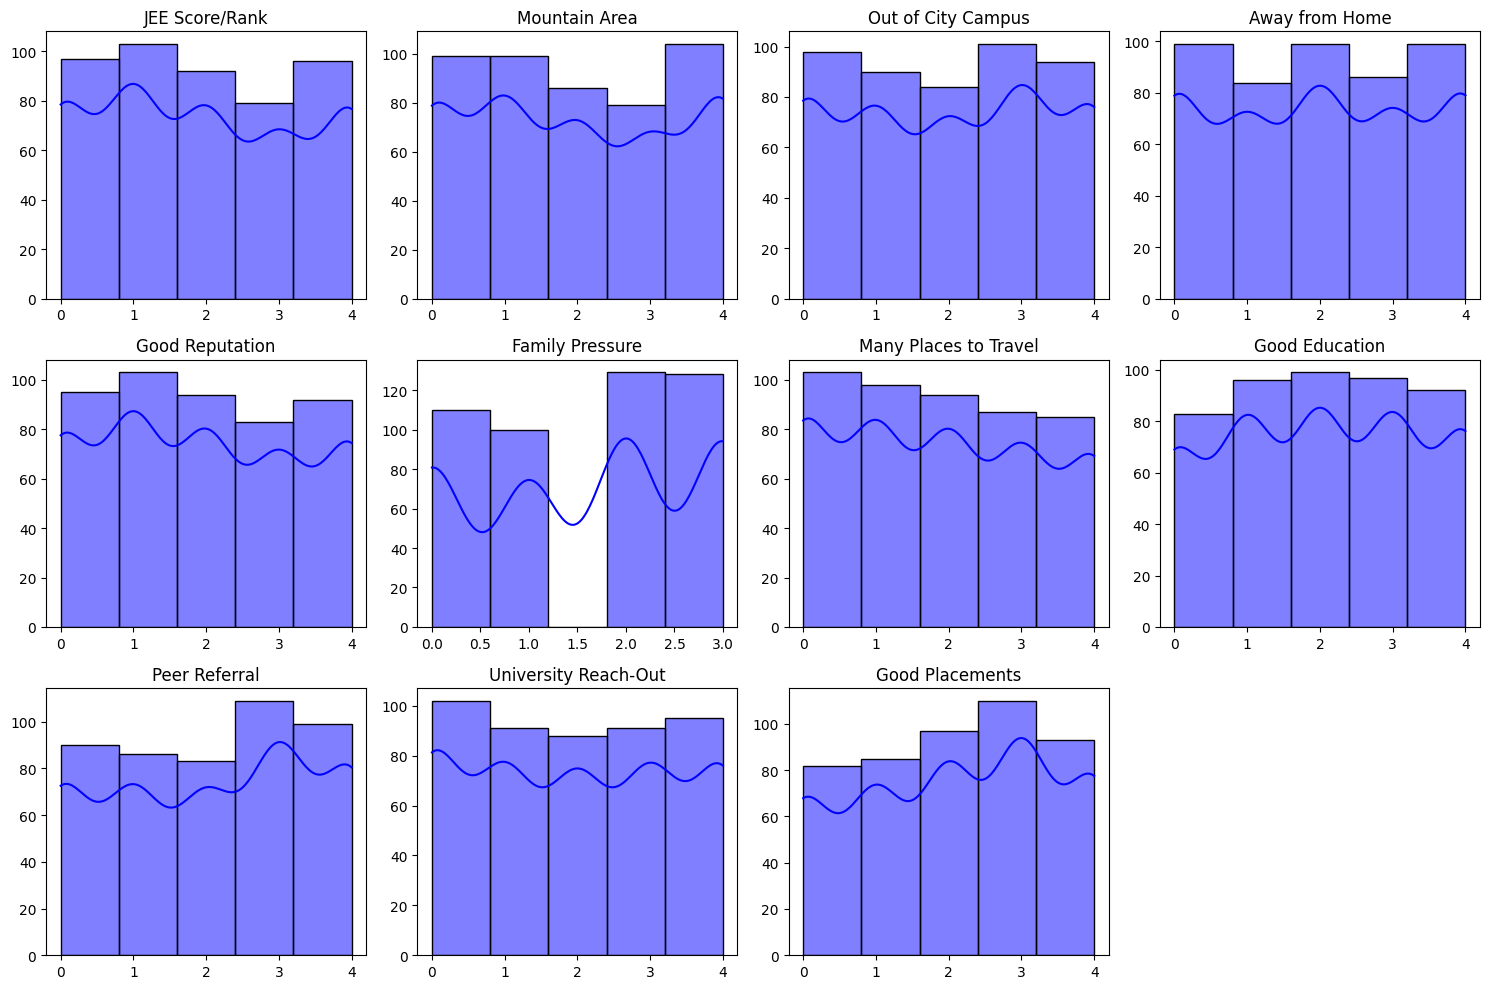

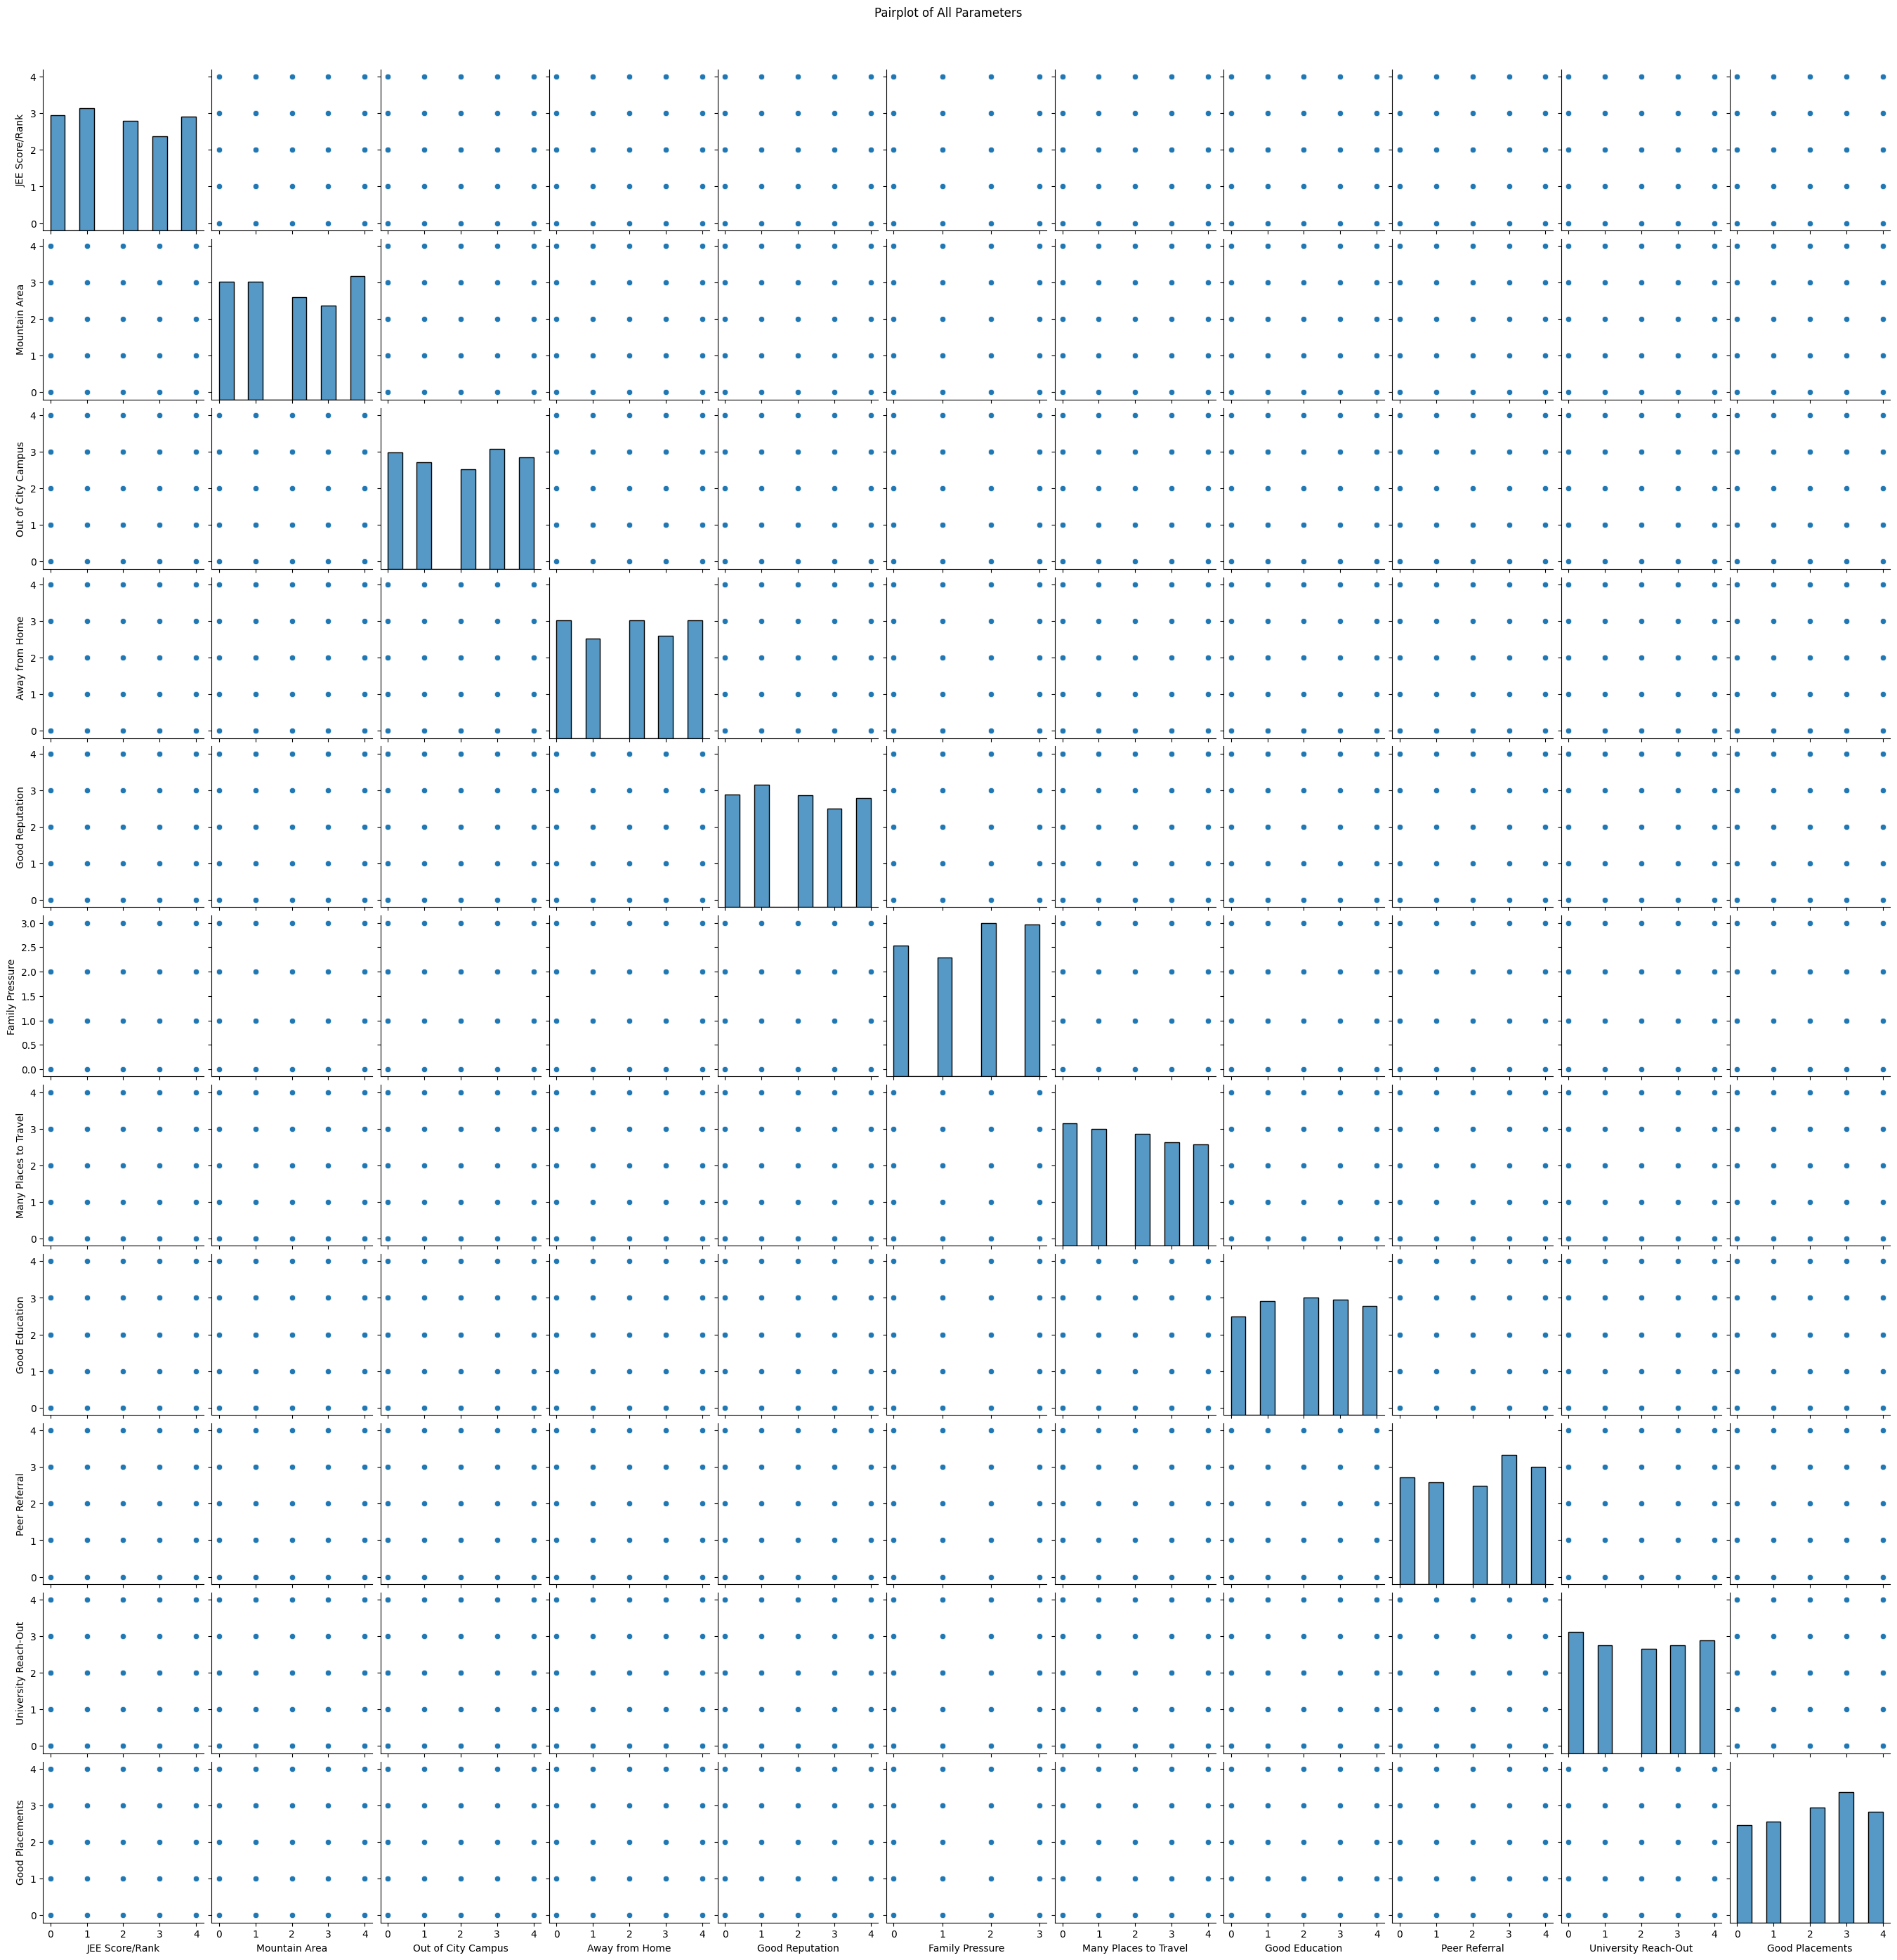


Average Scores for Each Parameter:
JEE Score/Rank           1.944325
Mountain Area            1.978587
Out of City Campus       2.006424
Away from Home           2.004283
Good Reputation          1.944325
Family Pressure          1.588865
Many Places to Travel    1.899358
Good Education           2.040685
Peer Referral            2.087794
University Reach-Out     1.970021
Good Placements          2.100642
dtype: float64


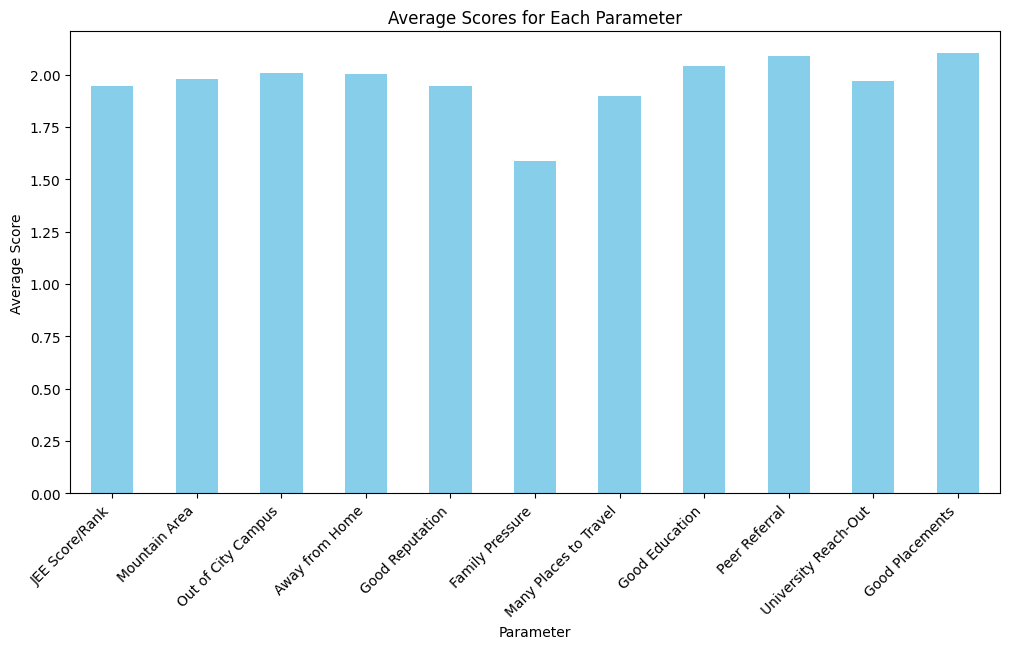

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student_data_join_factors.csv')

# Basic Data Exploration
print("First few rows of the dataset:")
print(df.head())

print("\nDataset Summary:")
print(df.describe())

print("\nDataset Info:")
print(df.info())

# Calculate correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Visualize the distribution of each parameter
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[column], bins=5, kde=True, color='blue')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Pairplot to observe relationships between parameters
sns.pairplot(df)
plt.suptitle('Pairplot of All Parameters', y=1.02)
plt.show()

# Analyze the average score for each parameter
average_scores = df.mean()
print("\nAverage Scores for Each Parameter:")
print(average_scores)

# Plot the average scores
plt.figure(figsize=(12, 6))
average_scores.plot(kind='bar', color='skyblue')
plt.title('Average Scores for Each Parameter')
plt.xlabel('Parameter')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('student_data_join_factors.csv')

# Function to get the top reasons based on a specific score
def get_top_reasons(df, score, top_n=4):
    # Calculate the number of times each parameter received the target score
    reasons_count = df.apply(lambda x: x == score).sum().reset_index()
    reasons_count.columns = ['Parameter', 'Count']

    # Sort parameters by the count of the target score
    reasons_count = reasons_count.sort_values(by='Count', ascending=False)

    # Get the top N parameters
    top_reasons = reasons_count.head(top_n)
    return top_reasons

# Get the top 4 reasons for score 4 (Totally Agree)
top_reasons = get_top_reasons(df, 4)
print("\nTop 4 Reasons with Score 4 (Totally Agree):")
print(top_reasons)



Top 4 Reasons with Score 4 (Totally Agree):
        Parameter  Count
1   Mountain Area    104
3  Away from Home     99
8   Peer Referral     99
0  JEE Score/Rank     96


<ipython-input-9-78e91f31cd72>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Parameter', data=top_reasons, palette='viridis')


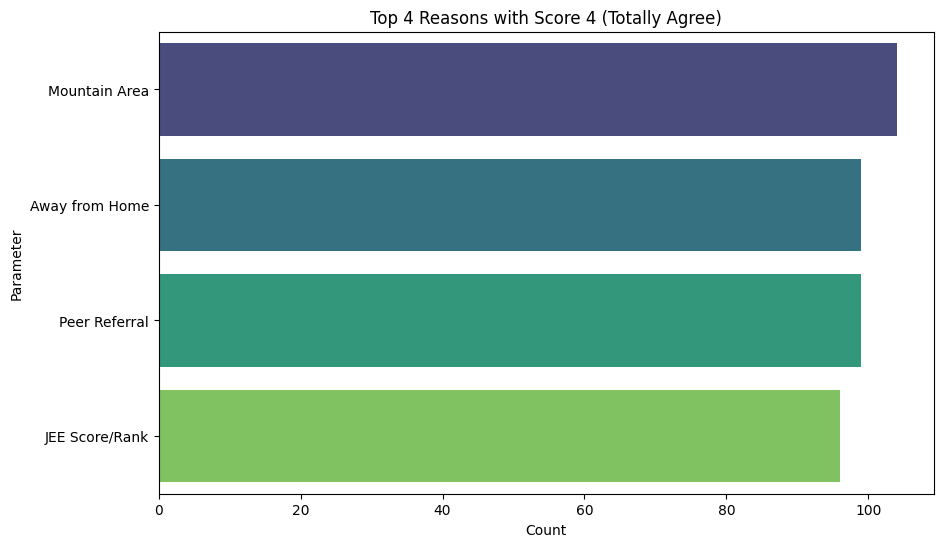

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Parameter', data=top_reasons, palette='viridis')
plt.title('Top 4 Reasons with Score 4 (Totally Agree)')
plt.xlabel('Count')
plt.ylabel('Parameter')
plt.show()